<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/hands_on_ml/Ch_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machines**

*Hard margin classification*

Consider a linearly sperable 2-class data. You can think of an SVM classifier 

1.   as fitting a widest possible street between the classes. Large margin classifier.

2.  boundary of this road will pass though the support vectors. Any data outside this road will not modify the model.

3. Sensitive to Feature Scaling

4. It is a hard margin classifier. Hence, highly sesitive to outliers.


*Soft margin classification*

1. The objective is to find a good balance between keeping the street as large as possible while limiting the margin violations (i.e., instances that endup in the middle of the streett or even on the wrong side). 


Tips:
1. If your SVM model is overfitting, you can try regularizing it by
reducing C

2. SVM's Can also be used for outlier detection


**SVM Regression**
The trick is to reverse the objective: instead of trying to fit the largest pos‐
sible street between two classes while limiting margin violations, SVM Regressiontries to fit as many instances as possible on the street while limiting margin violations(i.e., instances off the street).

1. The width of the street is controlled by a hyperparameter ϵ
2. Adding more training instances within the margin does not affect the model’s predictions; thus, the model is said to be ϵ-insensitive.


# imports

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pprint as pp

import os
import urllib
import tarfile
import urllib.request
from zipfile import ZipFile

import scipy
from scipy import stats

import sklearn
from sklearn import datasets

from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.datasets import fetch_openml
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#from sklearn.externals import joblib

from sklearn.multiclass import OneVsOneClassifier

from sklearn.neighbors import KNeighborsClassifier

from pandas.plotting import scatter_matrix

np.random.seed(42)
random.seed(42)

#Data

In [ ]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
X = iris['data']
y = iris['target']
X.shape

(150, 4)

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
print("test : ",len(X_test),"\ntrain : ",len(X_train))

test :  30 
train :  120


In [ ]:
y_train

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

#LinearSVC

In [ ]:
svm_clf = Pipeline([
                    ('scaler', StandardScaler()),
                    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

In [ ]:
svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
y_pred = svm_clf.predict(X_test)
sum(y_pred==y_test)/len(y_test)

0.8333333333333334

In [ ]:
pp.pprint(sorted(svm_clf.get_params().keys()))

['linear_svc',
 'linear_svc__C',
 'linear_svc__class_weight',
 'linear_svc__dual',
 'linear_svc__fit_intercept',
 'linear_svc__intercept_scaling',
 'linear_svc__loss',
 'linear_svc__max_iter',
 'linear_svc__multi_class',
 'linear_svc__penalty',
 'linear_svc__random_state',
 'linear_svc__tol',
 'linear_svc__verbose',
 'memory',
 'scaler',
 'scaler__copy',
 'scaler__with_mean',
 'scaler__with_std',
 'steps',
 'verbose']


##Grid Search

In [ ]:
param_grid = [
              {'linear_svc__loss':['hinge'],
               'linear_svc__C':[1,2,3,4,5,6,7,8,9, 10, 11],
               'linear_svc__max_iter':[1000, 100000]
               }
]
grid_search = GridSearchCV(svm_clf, param_grid, cv=10, refit=True, verbose=0)
grid_search.fit(X_train, y_train)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(mean_score, params)
grid_search.best_params_

0.9166666666666666 {'linear_svc__C': 1, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 1000}
0.9166666666666666 {'linear_svc__C': 1, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 100000}
0.9333333333333333 {'linear_svc__C': 2, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 1000}
0.9333333333333333 {'linear_svc__C': 2, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 100000}
0.9333333333333333 {'linear_svc__C': 3, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 1000}
0.9333333333333333 {'linear_svc__C': 3, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 100000}
0.9333333333333333 {'linear_svc__C': 4, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 1000}
0.9333333333333333 {'linear_svc__C': 4, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 100000}
0.9333333333333333 {'linear_svc__C': 5, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 1000}
0.9333333333333333 {'linear_svc__C': 5, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 100000}


{'linear_svc__C': 2, 'linear_svc__loss': 'hinge', 'linear_svc__max_iter': 1000}

In [ ]:
cvres.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_linear_svc__C', 'param_linear_svc__loss', 'param_linear_svc__max_iter', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=2, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = grid_search.best_estimator_.predict(X_test)

[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]


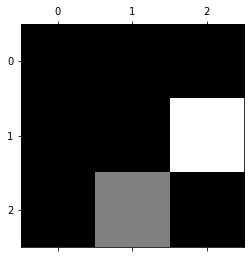

In [ ]:
conf_mat = confusion_matrix(y_test, final_predictions)
print(conf_mat)
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
plt.show()

#Nonlinear SVM

In [ ]:
polynomial_svm_clf = Pipeline([
                               ("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [ ]:
polynomial_svm_clf.fit(X_train, y_train)
y_pred = polynomial_svm_clf.predict(X_test)
sum(y_pred==y_test)/len(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

##Grid Search

In [ ]:
pp.pprint(sorted(polynomial_svm_clf.get_params().keys()))

['memory',
 'poly_features',
 'poly_features__degree',
 'poly_features__include_bias',
 'poly_features__interaction_only',
 'poly_features__order',
 'scaler',
 'scaler__copy',
 'scaler__with_mean',
 'scaler__with_std',
 'steps',
 'svm_clf',
 'svm_clf__C',
 'svm_clf__class_weight',
 'svm_clf__dual',
 'svm_clf__fit_intercept',
 'svm_clf__intercept_scaling',
 'svm_clf__loss',
 'svm_clf__max_iter',
 'svm_clf__multi_class',
 'svm_clf__penalty',
 'svm_clf__random_state',
 'svm_clf__tol',
 'svm_clf__verbose',
 'verbose']


In [ ]:
param_grid = [
              {'poly_features__degree':[1,2,3,4,5,6],
                'svm_clf__loss':['hinge'],
               'svm_clf__C':[1,2,3,4,5,6,7,8,9, 10, 11],
               'svm_clf__max_iter':[1000]
               }
]
grid_search = GridSearchCV(polynomial_svm_clf, param_grid, cv=10, refit=True, verbose=0)
grid_search.fit(X_train, y_train)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(mean_score, params)
grid_search.best_params_

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


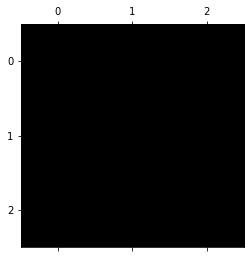

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = grid_search.best_estimator_.predict(X_test)
conf_mat = confusion_matrix(y_test, final_predictions)
print(conf_mat)
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
plt.show()

#SVC

In [ ]:
poly_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
                                ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
poly_kernel_svm_clf.fit(X_train, y_train)
y_pred = poly_kernel_svm_clf.predict(X_test)
sum(y_pred==y_test)/len(y_test)

0.9666666666666667

##Grid Search

In [ ]:
pp.pprint(sorted(poly_kernel_svm_clf.get_params().keys()))

['memory',
 'scaler',
 'scaler__copy',
 'scaler__with_mean',
 'scaler__with_std',
 'steps',
 'svm_clf',
 'svm_clf__C',
 'svm_clf__break_ties',
 'svm_clf__cache_size',
 'svm_clf__class_weight',
 'svm_clf__coef0',
 'svm_clf__decision_function_shape',
 'svm_clf__degree',
 'svm_clf__gamma',
 'svm_clf__kernel',
 'svm_clf__max_iter',
 'svm_clf__probability',
 'svm_clf__random_state',
 'svm_clf__shrinking',
 'svm_clf__tol',
 'svm_clf__verbose',
 'verbose']


In [ ]:
param_grid = [
              {'svm_clf__kernel':['linear', 'poly', 'rbf', 'sigmoid',],
               'svm_clf__C':[0.001, 0.01, 0.1, 1],
               'svm_clf__max_iter':[1000],
               'svm_clf__gamma':['scale','auto']
               }
]
grid_search = GridSearchCV(poly_kernel_svm_clf, param_grid, cv=5, refit=True, verbose=0)
grid_search.fit(X_train, y_train)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(mean_score, params)
grid_search.best_params_

0.8666666666666668 {'svm_clf__C': 0.001, 'svm_clf__gamma': 'scale', 'svm_clf__kernel': 'linear', 'svm_clf__max_iter': 1000}
0.7666666666666667 {'svm_clf__C': 0.001, 'svm_clf__gamma': 'scale', 'svm_clf__kernel': 'poly', 'svm_clf__max_iter': 1000}
0.8916666666666666 {'svm_clf__C': 0.001, 'svm_clf__gamma': 'scale', 'svm_clf__kernel': 'rbf', 'svm_clf__max_iter': 1000}
0.8166666666666668 {'svm_clf__C': 0.001, 'svm_clf__gamma': 'scale', 'svm_clf__kernel': 'sigmoid', 'svm_clf__max_iter': 1000}
0.8666666666666668 {'svm_clf__C': 0.001, 'svm_clf__gamma': 'auto', 'svm_clf__kernel': 'linear', 'svm_clf__max_iter': 1000}
0.7666666666666667 {'svm_clf__C': 0.001, 'svm_clf__gamma': 'auto', 'svm_clf__kernel': 'poly', 'svm_clf__max_iter': 1000}
0.8916666666666666 {'svm_clf__C': 0.001, 'svm_clf__gamma': 'auto', 'svm_clf__kernel': 'rbf', 'svm_clf__max_iter': 1000}
0.8166666666666668 {'svm_clf__C': 0.001, 'svm_clf__gamma': 'auto', 'svm_clf__kernel': 'sigmoid', 'svm_clf__max_iter': 1000}
0.875 {'svm_clf__C':

{'svm_clf__C': 0.1,
 'svm_clf__gamma': 'scale',
 'svm_clf__kernel': 'linear',
 'svm_clf__max_iter': 1000}

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


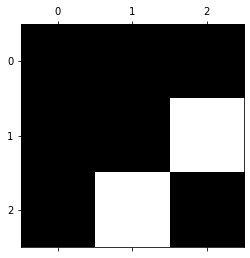

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = grid_search.best_estimator_.predict(X_test)
conf_mat = confusion_matrix(y_test, final_predictions)
print(conf_mat)
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
plt.show()